In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

/home/tasneem/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tasneem/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tasneem/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tasneem/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/tasneem/Downloads/classes (copy)'
valid_path = '/home/tasneem/Downloads/classes_test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# don't train existing weights
for layer in VGG19.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('/home/tasneem/Downloads/classes (copy)/*')

In [6]:
folders

['/home/tasneem/Downloads/classes (copy)/benign',
 '/home/tasneem/Downloads/classes (copy)/malignant']

In [7]:
# our layers - you can add more if you want
x = Flatten()(VGG19.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG19.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/home/tasneem/Downloads/classes (copy)',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 26512 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('/home/tasneem/Downloads/classes_test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6614 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
829/829 [==============================] - 3968s 5s/step - loss: 0.0962 - acc: 0.9822 - val_loss: 0.0838 - val_acc: 0.9825
Epoch 2/2
829/829 [==============================] - 3842s 5s/step - loss: 0.0857 - acc: 0.9823 - val_loss: 0.0818 - val_acc: 0.9825


In [18]:
model.save('CNN_kaggle_ISIC_transfer_learning_3.h5')
model.save_weights('CNN_kaggle_ISIC_transfer_learning_3_weights.h5')

In [38]:
#from keras.models import load_model
#model = load_model('CNN_kaggle_ISIC_transfer_learning_2.h5')

In [ ]:
'''import sklearn
from sklearn.metrics import roc_curve, auc

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)'''

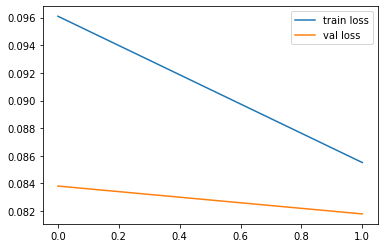

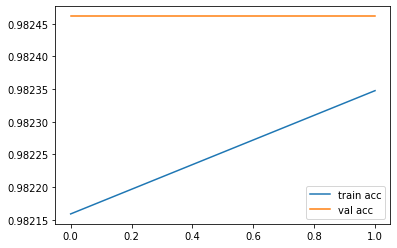

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_kaggle_vgg19_2.h5')

In [21]:

y_pred = model.predict(test_set)


In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model2=load_model('model_kaggle_vgg19_2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
img=image.load_img('/home/tasneem/Downloads/classes_test/benign/ISIC_0015719.jpg',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[153.,  87.,  53.],
        [155.,  97.,  75.],
        [157., 100.,  73.],
        ...,
        [175., 124.,  97.],
        [177., 128., 113.],
        [171., 125., 110.]],

       [[154.,  99.,  68.],
        [160., 103.,  76.],
        [159.,  98.,  70.],
        ...,
        [174., 124.,  97.],
        [167., 116.,  87.],
        [173., 123.,  96.]],

       [[159., 107.,  83.],
        [154., 101.,  69.],
        [157.,  99.,  75.],
        ...,
        [177., 126.,  95.],
        [167., 120.,  94.],
        [169., 120.,  87.]],

       ...,

       [[127.,  79.,  57.],
        [136.,  89.,  71.],
        [134.,  88.,  65.],
        ...,
        [160., 121., 106.],
        [160., 117., 101.],
        [162., 115.,  95.]],

       [[121.,  77.,  48.],
        [134.,  83.,  64.],
        [134.,  88.,  72.],
        ...,
        [159., 112.,  92.],
        [160., 123., 105.],
        [157., 118., 101.]],

       [[124.,  73.,  52.],
        [129.,  84.,  61.],
        [132.,  

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [37]:
if(a==1):
    print("malignant")
else:
    print("benign")

benign
